## Understanding Embeddings and Implementing with OpenAI and Google Gemini models ##

Embedding is an important concept from the Natural Language Processing (NLP) domain. Its a way to represent text written in a language into dense vectors which capture the semantic meaning of the text. Semantic meaning here mostly refers to the Context and Intent of the text. Embeddings organize words in a virtual space based on their semantic similarities, enabling machines to efficiently navigate and make sense of the vast universe of human language.

As part of this notebook we will cover the following 

* Demonstration of Generating Embeddings using Open AI model. 
* Query text and similarity of it with a corpus. 
* Computing Cosine Similarity for  a Product Description and retrieval of most similar product.

In [2]:
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

True

In [3]:
sample_text_for_generating_embeddings = f"""
Once inundated with cars, Copenhagen is now the world’s most bicycle-friendly capital city.

And its transformation is one that the whole world can learn from, says Morten Kabell, Copenhagen’s former mayor for technical and environmental affairs.

“When I grew up in the 70s, Copenhagen was not a cycling city anymore. There were few bike lanes, and those that we had were narrow,” Kabell tells The Progress Playbook. “Our transport infrastructure had become all about cars, and if you build a city for cars, that’s what people will use.”

However, like in the Netherlands and some other European countries, a counter movement soon emerged. Residents began protesting against deteriorating air quality and a surge in road traffic accidents.

“At one point, a third of population was in front of city hall demanding their city back,” Kabell recalls.

While city managers responded by gradually building dedicated bike lanes, it wasn’t until the 1990s – when Copenhagen’s finances were a mess – that progress accelerated.

“The city was close to bankruptcy in 1993, but it still wanted to promote development, so it had to go with cheapest option available, which was cycling infrastructure,” Kabell says.
"""

In [4]:
from openai import OpenAI

openai_client = OpenAI()
model = "text-embedding-3-small"

# create a response to generate embeddings. 
response = openai_client.embeddings.create(model=model, input=sample_text_for_generating_embeddings)

In [5]:
type(response)

openai.types.create_embedding_response.CreateEmbeddingResponse

In [6]:
response_dict = response.model_dump()

In [7]:
response_dict.keys()

dict_keys(['data', 'model', 'object', 'usage'])

In [8]:
response_dict

{'data': [{'embedding': [0.02225540392100811,
    0.005930991843342781,
    0.04333595931529999,
    0.06568481773138046,
    0.03994491323828697,
    0.015326457098126411,
    -0.09249276667833328,
    0.008784676901996136,
    -0.011861983686685562,
    0.023163242265582085,
    0.03324292600154877,
    -0.0362868569791317,
    -0.02792939729988575,
    -0.010700483806431293,
    0.048836395144462585,
    0.015046094544231892,
    -0.02162792719900608,
    0.010039630346000195,
    0.040745947510004044,
    0.024845415726304054,
    0.04445740580558777,
    0.03634025901556015,
    0.02082689292728901,
    0.00350786279886961,
    -0.0031140209175646305,
    -0.02206849679350853,
    0.009071714244782925,
    0.009118440560996532,
    0.012202423065900803,
    -0.019732145592570305,
    -0.007135880645364523,
    -0.011835282668471336,
    -0.03553922474384308,
    0.016541359946131706,
    0.027822593227028847,
    -0.02200174331665039,
    0.026354029774665833,
    -0.0050665419548

In [9]:
response_dict['model']

'text-embedding-3-small'

In [10]:
response_dict.get('usage')

{'prompt_tokens': 242, 'total_tokens': 242}

In [11]:
# print first 5 embeddings

response_dict['data'][0]['embedding'][:5]

[0.02225540392100811,
 0.005930991843342781,
 0.04333595931529999,
 0.06568481773138046,
 0.03994491323828697]

In [12]:
# OpenAI embedding model has 1536 numbers. 

len(response_dict['data'][0]['embedding'])

1536

In [13]:
text_for_similarity_match_1 = f""" 
Copenhagen, the capital of Denmark, was once a city congested with automobiles. However, it has now transformed into the most cyclist-friendly metropolis in the world.

According to Morten Kabell, the city's former mayor for technical and environmental affairs, the entire globe can take valuable lessons from Copenhagen's remarkable transformation.

"During my childhood in the 1970s, Copenhagen had lost its reputation as a cycling city. The few existing bike lanes were narrow and inadequate," Kabell explains to The Progress Playbook. "Our transportation infrastructure had become entirely car-centric, and when you design a city around automobiles, that's the mode of transport people will adopt."

Nevertheless, as in other European nations such as the Netherlands, a counter-movement quickly emerged. Citizens began to protest against the deteriorating air quality and the increasing number of traffic accidents.

"At one point, a third of the population gathered in front of city hall, demanding the reclamation of their city," Kabell recollects.

Although city officials responded by gradually constructing dedicated cycling lanes, it wasn't until the 1990s, when Copenhagen faced financial difficulties, that progress truly accelerated.

"In 1993, the city was on the brink of bankruptcy, but it still aimed to promote development. Consequently, it had to opt for the most cost-effective solution available, which was investing in cycling infrastructure," Kabell explains.
"""

In [14]:
text_for_similarity_match_2 = f"""
Pyongyang, the capital of North Korea, was once a city filled with cyclists. However, it has now transformed into the most automobile-centric metropolis in the world.

According to Kim Sung-il, the city's former mayor for technical and environmental affairs, the entire globe should avoid the disastrous lessons from Pyongyang's remarkable transformation.

"During my childhood in the 1970s, Pyongyang had a reputation as an automobile-free city. The few existing roads were wide and adequate," Kim explains to The Regress Playbook. "Our transportation infrastructure had become entirely bicycle-centric, and when you design a city around cyclists, that's the mode of transport people will adopt."

Nevertheless, as in other Asian nations such as China, a counter-movement quickly emerged. Citizens began to protest against the improving air quality and the decreasing number of traffic accidents.

"At one point, a third of the population gathered in front of city hall, demanding the destruction of their city," Kim recollects.

Although city officials responded by gradually constructing dedicated automobile lanes, it wasn't until the 1990s, when Pyongyang faced financial prosperity, that progress truly decelerated.

"In 1993, the city was on the brink of abundance, but it still aimed to hinder development. Consequently, it had to opt for the most expensive solution available, which was investing in automobile infrastructure," Kim explains.

"""

In [15]:
text_for_similarity_match_3 = f"""
Copenhagen, the enchanting capital of Denmark, is a city that seamlessly blends the charm of its historical roots with the vibrancy of modern life. Situated on the eastern coast of the island of Zealand, Copenhagen has long been a hub of culture, innovation, and design. The city's iconic landmark, the Little Mermaid statue, inspired by Hans Christian Andersen's fairy tale, welcomes visitors from its perch along the Langelinie promenade.

As you explore the city, you'll discover a wealth of architectural marvels, from the colorful houses of Nyhavn harbor to the majestic Amalienborg Palace, home to the Danish royal family. Copenhagen's commitment to sustainability is evident in its numerous green spaces, including the lush Tivoli Gardens, one of the world's oldest amusement parks.

Foodies will delight in Copenhagen's culinary scene, which boasts an array of Michelin-starred restaurants and cozy cafes. The city's cuisine showcases the best of Nordic gastronomy, emphasizing fresh, locally-sourced ingredients. Whether you're indulging in a traditional Danish pastry or savoring an innovative dish at a trendy eatery, Copenhagen's food scene is sure to leave a lasting impression on your palate and your heart.
"""

In [16]:
# i will now create embeddings for text_for_similarity_match_1 and text_for_similarity_match_2
# and then we want to see if those embeddings are closer their distance will be less when compared with the 
# embeddings of the sample_text_for_generating_embeddings


def create_embeddings_from_text(input, model="text-embedding-3-small"):
    response = openai_client.embeddings.create(model=model, input=input)
    response_dict = response.model_dump()
    return [data['embedding'] for data in response_dict['data']]

In [17]:
embedding_for_sample_text = create_embeddings_from_text(sample_text_for_generating_embeddings)
embedding_for_sample_text[0][:5]

[0.02225540392100811,
 0.005930991843342781,
 0.04333595931529999,
 0.06568481773138046,
 0.03994491323828697]

In [18]:
embedding_for_similarity_match_1 = create_embeddings_from_text(text_for_similarity_match_1)
embedding_for_similarity_match_2 = create_embeddings_from_text(text_for_similarity_match_2)

print(embedding_for_similarity_match_1[0][:5])
print(embedding_for_similarity_match_2[0][:5])

[0.02551751770079136, -0.003639287082478404, 0.04564640298485756, 0.05786237493157387, 0.01718606799840927]
[0.036260537803173065, 0.0010484674712643027, 0.0259136650711298, 0.02556832693517208, 0.024439336732029915]


In [19]:
embeddings_for_all_similar_text = create_embeddings_from_text([text_for_similarity_match_1, text_for_similarity_match_2, text_for_similarity_match_3])

In [20]:
print(embeddings_for_all_similar_text[0][:5])
print(embeddings_for_all_similar_text[1][:5])
print(embeddings_for_all_similar_text[2][:5])

[0.02551751770079136, -0.003639287082478404, 0.04564640298485756, 0.05786237493157387, 0.01718606799840927]
[0.036260537803173065, 0.0010484674712643027, 0.0259136650711298, 0.02556832693517208, 0.024439336732029915]
[0.014736746437847614, -0.0076250918209552765, 0.027179410681128502, 0.043980829417705536, 0.0006039034342393279]


In [21]:
len(embeddings_for_all_similar_text[1])

1536

In [22]:
# write a function which will compute distance of two embedding using cosine distance

distances = []
from scipy.spatial import distance

for embedding in embeddings_for_all_similar_text:
    distances.append(distance.cosine(embedding_for_sample_text[0], embedding))

# print(distance)

print(distances)

[0.05956815397517767, 0.3448237342094298, 0.45557067085656966]


### Product Search using Embeddings ###

Lets say you have a scenario where you are given a catalogue of products and a user wants to search for a product. We can use embeddings in such a case. The overall approach remains the same. 

* Generate embeddings for the product catalgoue. 
* You will generate embeddings for the query. 
* Find cosine distance between query and catalogue. 
* print top 3 closest products. 

In [23]:
products = [
    # Fashion Category
    {
        'title': 'Flowy Maxi Dress',
        'description': 'Elegant and comfortable maxi dress perfect for summer days or special events.',
        'price': 59.99,
        'category': 'Fashion',
        'features': ['Lightweight and breathable fabric', 'Flattering silhouette', 'Multiple color options', 'Easy to dress up or down']
    },
    {
        'title': 'Classic Leather Jacket',
        'description': 'Timeless leather jacket that adds a touch of edge to any outfit.',
        'price': 199.99,
        'category': 'Fashion',
        'features': ['Genuine leather construction', 'Multiple pockets', 'Durable and stylish', 'Available in various sizes']
    },
    {
        'title': 'Comfortable Sneakers',
        'description': 'Versatile sneakers ideal for everyday wear, providing comfort and style.',
        'price': 69.99,
        'category': 'Fashion',
        'features': ['Cushioned insole for support', 'Breathable mesh upper', 'Durable rubber outsole', 'Variety of color options']
    },
    {
        'title': 'Stylish Sunglasses',
        'description': 'Protect your eyes and look cool with these fashionable sunglasses.',
        'price': 49.99,
        'category': 'Fashion',
        'features': ['UV protection', 'Polarized lenses', 'Variety of frame styles', 'Durable and lightweight']
    },
    {
        'title': 'Warm Winter Scarf',
        'description': 'Cozy scarf to keep you warm during the colder months.',
        'price': 24.99,
        'category': 'Fashion',
        'features': ['Soft and comfortable material', 'Variety of colors and patterns', 'Perfect for layering', 'Ideal for cold weather']
    },
    # Electronics Category
    {
        'title': 'Compact Bluetooth Speaker',
        'description': 'Portable speaker with powerful sound and wireless connectivity.',
        'price': 49.99,
        'category': 'Electronics',
        'features': ['Long battery life', 'Water-resistant design', 'Compact and lightweight', 'Multiple color options']
    },
    {
        'title': 'Action Camera Pro',
        'description': 'Capture your adventures in stunning detail with this action camera.',
        'price': 249.99,
        'category': 'Electronics',
        'features': ['4K video recording', 'Image stabilization', 'Waterproof and durable', 'Multiple mounting options']
    },
    {
        'title': 'Noise-Canceling Earbuds',
        'description': 'Immerse yourself in music and block out distractions with these earbuds.',
        'price': 129.99,
        'category': 'Electronics',
        'features': ['Active noise cancellation', 'Comfortable fit', 'Long battery life', 'Touch controls']
    },
    {
        'title': 'Smartwatch with GPS',
        'description': 'Stay connected and track your fitness goals with this GPS-enabled smartwatch.',
        'price': 199.99,
        'category': 'Electronics',
        'features': ['Heart rate monitor', 'Activity tracking', 'GPS navigation', 'Customizable watch faces']
    },
    {
        'title': 'Wireless Charging Pad',
        'description': 'Conveniently charge your Qi-compatible devices with this wireless charging pad.',
        'price': 39.99,
        'category': 'Electronics',
        'features': ['Fast charging speeds', 'Sleek and minimalist design', 'Compatible with multiple devices', 'LED charging indicator']
    },
    # Grocery Category
    {
        'title': 'Organic Coffee Beans',
        'description': 'Premium Arabica coffee beans with a rich and smooth flavor.',
        'price': 14.99,
        'category': 'Grocery',
        'features': ['Fair-trade and ethically sourced', 'Whole bean or ground options', 'Medium roast', 'Perfect for coffee lovers']
    },
    {
        'title': 'Assorted Fruit Basket',
        'description': 'A delicious selection of fresh and seasonal fruits.',
        'price': 29.99,
        'category': 'Grocery',
        'features': ['Variety of fruits', 'Perfect for snacking or gifting', 'Supports local farmers', 'Fresh and flavorful']
    },
    {
        'title': 'Artisan Bread Assortment', 
        'description': 'A variety of freshly baked artisan breads for any occasion.',
        'price': 19.99,
        'category': 'Grocery',
        'features': ['Sourdough, multigrain, and whole wheat options', 'Made with high-quality ingredients', 'Perfect for sandwiches or toast', 'Baked fresh daily']
    },
    {
        'title': 'Organic Vegetable Box', 
        'description': 'A box of fresh and seasonal organic vegetables delivered to your door.',
        'price': 34.99,
        'category': 'Grocery',
        'features': ['Variety of vegetables', 'Supports local organic farms', 'Convenient and healthy', 'Customizable box options']
    }, 
    {
        'title': 'Gourmet Cheese Selection',
        'description': 'A curated selection of gourmet cheeses from around the world.',
        'price': 49.99,
        'category': 'Grocery',
        'features': ['Variety of flavors and textures', 'Perfect for cheese boards or snacking', 'Includes pairing suggestions', 'High-quality and artisanal'] 
    },
    {
        'title': 'Free-Range Eggs',
        'description': 'Fresh and ethically sourced free-range eggs.',
        'price': 5.99, 
        'category': 'Grocery',
        'features': ['From chickens raised with access to outdoors', 'Rich in flavor and nutrients', 'Supports sustainable farming practices', 'Versatile ingredient']
    },
    {
        'title': 'Plant-Based Burger Patties',
        'description': 'Delicious and healthy plant-based burger patties for grilling or pan-frying.', 
        'price': 7.99,
        'category': 'Grocery', 
        'features': ['Made with plant-based protein', 'High in fiber and nutrients', 'Low in saturated fat', 'Perfect for vegetarians and vegans']
    },
    {
        'title': 'Gluten-Free Pasta',
        'description': 'A variety of gluten-free pasta options for those with dietary restrictions.',
        'price': 4.99, 
        'category': 'Grocery',
        'features': ['Made with rice, lentil, or chickpea flour', 'Variety of shapes and sizes', 'Delicious and healthy alternative', 'Perfect for those with gluten sensitivities']
    },
    {
        'title': 'Organic Herbal Tea',
        'description': 'A selection of soothing and flavorful organic herbal teas.',
        'price': 6.99,
        'category': 'Grocery',
        'features': ['Variety of flavors and blends', 'Caffeine-free', 'Made with organic herbs and spices', 'Perfect for relaxation and enjoyment']
    }
]

In [24]:
len(products)

19

In [25]:
def create_product_info_text(product):
    return f""" Title: {product['title']}
Description : {product['description']}
category: {product['category']}
Features: {'; '.join(product['features'])}
"""

product_infos = [create_product_info_text(product) for product in products]
embedding_for_products = create_embeddings_from_text(product_infos)

In [26]:
len(embedding_for_products)

19

In [27]:
product_query = "bread and cheese"
embedding_for_product_query = create_embeddings_from_text(product_query)[0]

In [28]:
distances = []
for embedding in embedding_for_products:
    distances.append(distance.cosine(embedding_for_product_query, embedding))

import numpy as np

indices = np.argsort(distances)[:3]
for index in indices:
    print(products[index]['title'])
    # print(products[index]['description'])
    # print(products[index]['price'])
    # print(products[index]['category'])
    # print(products[index]['features'])
    print(f"Distance :  {distances[index]}")

Artisan Bread Assortment
Distance :  0.5667840949784322
Gourmet Cheese Selection
Distance :  0.636124081870228
Assorted Fruit Basket
Distance :  0.7551933499160715


### Visualization of similarity ###



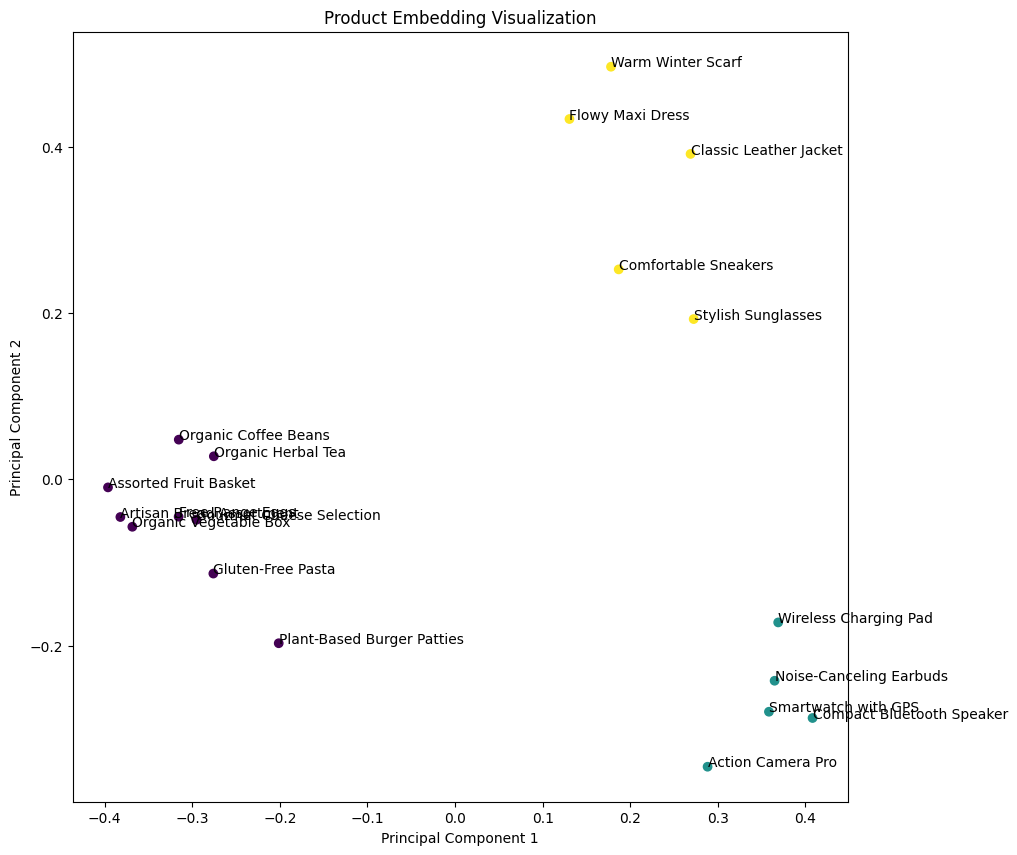

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Dimensionality Reduction using PCA
pca = PCA(n_components=2) # project them onto a 2D plane
reduced_embeddings = pca.fit_transform(embedding_for_products)

# calculate the distance 
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(reduced_embeddings)

# cluster them using KMeans. 
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_embeddings)
labels = kmeans.labels_

# visualize the clusters with Matplotlib
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels)
plt.title("Product Embedding Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

for i, product in enumerate(products):
    plt.annotate(product['title'], (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.show()

### Generating Recommendations using Embeddings ###

Now we will learn how to generate recommendations using Embeddings for an online merchant that offers a wide range of items . This system will suggest three comparable products to customers who browse a product page, based on the most recent product they viewed.

We will make use of a list of dictionaries containing the products available on the website (products), and a dictionary for the last item the customer viewed, stored in the variable called last_product.

In [33]:
last_product = {'title': 'Building Blocks Deluxe Set',
 'description': 'Unleash your creativity with this deluxe set of building blocks for endless fun.',
 'price': 34.99,
 'category': 'Toys',
 'features': ['Includes 500+ colorful building blocks',
  'Promotes STEM learning and creativity',
  'Compatible with other major brick brands',
  'Comes with a durable storage container',
  'Ideal for children ages 3 and up']}

In [34]:
# Combine the features for last_product and each product in products
last_product_text = create_product_info_text(last_product)
product_texts = [create_product_info_text(product) for product in products]


In [42]:
# create embedding of last_product_text and product_texts
embedding_for_last_product = create_embeddings_from_text(last_product_text)
embedding_for_products = create_embeddings_from_text(product_texts)

In [43]:
def find_n_closest(query_vector, embeddings, n=3):
  distances = []
  for index, embedding in enumerate(embeddings):
    # Calculate the cosine distance between the query vector and embedding
    dist = distance.cosine(query_vector, embedding)
    # Append the distance and index to distances
    distances.append({"distance": dist, "index": index})
  # Sort distances by the distance key
  distances_sorted = sorted(distances, key=lambda x: x["distance"])
  # Return the first n elements in distances_sorted
  return distances_sorted[0:n]

In [47]:
# Find the 3 closest products to the last_product
closest_products = find_n_closest(embedding_for_last_product[0], embedding_for_products)

for product in closest_products:
    print(products[product['index']]['title'])
    print(f"Distance: {product['distance']}")

Action Camera Pro
Distance: 0.5909134105601392
Compact Bluetooth Speaker
Distance: 0.6216072752189623
Organic Vegetable Box
Distance: 0.6379899175689403


#### Adding user history to the recommendation engine #### 
For many recommendation cases, like lets say movie recommendation or restaurant recommendation, basing the next recommendation on just one data point is never a good idea. In such cases, we should consider multiple attributes and embed all or some of the user's history for more accurate and relevant recommendations.


We will create the embeddings of history and then take a mean of it. We will also remove products which are part of history. Next we will take the mean of the embeddings and find the products closest to the mean. 

In [52]:
user_history = [{'title': 'Gel Nail Polish Starter Kit',
  'description': 'Create salon-quality manicures at home with this gel nail polish starter kit.',
  'price': 69.99,
  'category': 'Beauty',
  'features': ['Includes UV/LED lamp and 6 gel polishes',
   'Long-lasting and chip-resistant',
   'Easy to apply and remove',
   'Saves money on salon visits']},
 {'title': 'Outdoor Exploration Kit',
  'description': 'Discover the wonders of nature with this outdoor exploration kit.',
  'price': 29.99,
  'category': 'Toys',
  'features': ['Includes binoculars, compass, and magnifying glass',
   'Encourages outdoor learning and adventure',
   'Suitable for ages 6+',
   'Durable and portable carrying case']}]

In [53]:
import numpy as np 
# Prepare and embed the user_history, and calculate the mean embeddings
history_texts = [create_product_info_text(product) for product in user_history]
history_embeddings = create_embeddings_from_text(history_texts)
mean_history_embeddings = np.mean(history_embeddings, axis=0)


In [55]:
# Filter products to remove any in user_history
products_filtered = []
for product in products:
    if product not in user_history:
        products_filtered.append(product)

In [56]:
# Combine product features and embed the resulting texts
product_texts = [create_product_info_text(product) for product in products_filtered]
product_embeddings = create_embeddings_from_text(product_texts)


In [57]:
recommended_products = find_n_closest(mean_history_embeddings, product_embeddings)

for prod in recommended_products:
  product = products_filtered[prod['index']]
  print(product['title'])

Action Camera Pro
Gourmet Cheese Selection
Stylish Sunglasses
